Neste Notebook são abertos dados relativos a imagens de satelite (.nc), conversão desses dados para um formato de dataframe (e divisão desta dataframe em diversas dataframes conforme o dia). Os valores da Temperatura são colocados num formato de Numpy Array (pois queremos que a aplicação do Canny Algorithm seja num Numpy Array). É feita a visualização da imagem relativa à SST para cada dia duma forma despixilizada (contour) e aplicado o canny a esta imagem. 

Para concluir o Canny é aplicado no Numpy array dos valores da temperatura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os

%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa aos ultimos 10 dias dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [2]:
current_path = os.getcwd()
current_path

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks'

In [3]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks\\../data'

In [4]:
nc_path = os.path.join(data_folder, "IBI-july2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [5]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(11),

In [6]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
datadf2 = datadf.reset_index()

In [7]:
datadf2 = datadf2.drop(['depth'], axis=1)
datadf2    #os dados .nc estão agora no formato de uma dataframe

,latitude,time,longitude,thetao
0,35.0,2019-07-10 12:00:00,-19.000000,21.632999
1,35.0,2019-07-10 12:00:00,-18.916666,21.527000
2,35.0,2019-07-10 12:00:00,-18.833334,21.371000
3,35.0,2019-07-10 12:00:00,-18.750000,21.199001
4,35.0,2019-07-10 12:00:00,-18.666666,21.072001
...,...,...,...,...
224934,45.0,2019-07-20 12:00:00,-5.333334,20.971001
224935,45.0,2019-07-20 12:00:00,-5.250000,20.945000
224936,45.0,2019-07-20 12:00:00,-5.166667,20.938000
224937,45.0,2019-07-20 12:00:00,-5.083334,20.936001


In [8]:
datadf2 = datadf2[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
datadf2

,time,latitude,longitude,thetao
0,2019-07-10 12:00:00,35.0,-19.000000,21.632999
1,2019-07-10 12:00:00,35.0,-18.916666,21.527000
2,2019-07-10 12:00:00,35.0,-18.833334,21.371000
3,2019-07-10 12:00:00,35.0,-18.750000,21.199001
4,2019-07-10 12:00:00,35.0,-18.666666,21.072001
...,...,...,...,...
224934,2019-07-20 12:00:00,45.0,-5.333334,20.971001
224935,2019-07-20 12:00:00,45.0,-5.250000,20.945000
224936,2019-07-20 12:00:00,45.0,-5.166667,20.938000
224937,2019-07-20 12:00:00,45.0,-5.083334,20.936001


In [9]:
#Para analisarmos os dados relativos ao dia 2019-12-14
dia10 = datadf2[datadf2['time'] == '2019-07-10 12:00:00']
dia10

,time,latitude,longitude,thetao
0,2019-07-10 12:00:00,35.0,-19.000000,21.632999
1,2019-07-10 12:00:00,35.0,-18.916666,21.527000
2,2019-07-10 12:00:00,35.0,-18.833334,21.371000
3,2019-07-10 12:00:00,35.0,-18.750000,21.199001
4,2019-07-10 12:00:00,35.0,-18.666666,21.072001
...,...,...,...,...
223244,2019-07-10 12:00:00,45.0,-5.333334,20.037001
223245,2019-07-10 12:00:00,45.0,-5.250000,20.059000
223246,2019-07-10 12:00:00,45.0,-5.166667,20.074001
223247,2019-07-10 12:00:00,45.0,-5.083334,20.069000


#### Código para que dada uma dataframe, esta seja dividida em várias dataframes consoante a data

Os dados que eu vou extrair do satelite serão referentes a vários dias diferentes portanto para facilitar o posterior processamento dos dados, esta função vai me permitir dividir a dataframe original em diversas dataframes conforme a data

In [10]:
datadf2

,time,latitude,longitude,thetao
0,2019-07-10 12:00:00,35.0,-19.000000,21.632999
1,2019-07-10 12:00:00,35.0,-18.916666,21.527000
2,2019-07-10 12:00:00,35.0,-18.833334,21.371000
3,2019-07-10 12:00:00,35.0,-18.750000,21.199001
4,2019-07-10 12:00:00,35.0,-18.666666,21.072001
...,...,...,...,...
224934,2019-07-20 12:00:00,45.0,-5.333334,20.971001
224935,2019-07-20 12:00:00,45.0,-5.250000,20.945000
224936,2019-07-20 12:00:00,45.0,-5.166667,20.938000
224937,2019-07-20 12:00:00,45.0,-5.083334,20.936001


In [11]:
#converter a coluna time para string (pode simplificar)
datadf2['time']=datadf2['time'].astype(str)

In [12]:
#Criar uma lista com as diferentes datas
unique_dates = datadf2['time'].unique()
list_dates = list(unique_dates)
list_dates

['2019-07-10 12:00:00',
 '2019-07-11 12:00:00',
 '2019-07-12 12:00:00',
 '2019-07-13 12:00:00',
 '2019-07-14 12:00:00',
 '2019-07-15 12:00:00',
 '2019-07-16 12:00:00',
 '2019-07-17 12:00:00',
 '2019-07-18 12:00:00',
 '2019-07-19 12:00:00',
 '2019-07-20 12:00:00']

In [13]:
n_unique = datadf2['time'].nunique()
n_unique    #nº de datas diferentes que há na dataframe

11

In [14]:
splits = list(datadf2.groupby("time"))   # divide a dataframe de acordo com a coluna 'time' e agrupa a informação numa lista

In [15]:
splits[1][0]

'2019-07-11 12:00:00'

In [16]:
d = {}
for i in range(n_unique):
    for time in list_dates:
        d[time] = pd.DataFrame(splits[i][1])

In [17]:
d

{'2019-07-10 12:00:00':                        time  latitude  longitude     thetao
 1690    2019-07-20 12:00:00      35.0 -19.000000  21.781000
 1691    2019-07-20 12:00:00      35.0 -18.916666  21.742001
 1692    2019-07-20 12:00:00      35.0 -18.833334  21.723000
 1693    2019-07-20 12:00:00      35.0 -18.750000  21.707001
 1694    2019-07-20 12:00:00      35.0 -18.666666  21.712002
 ...                     ...       ...        ...        ...
 224934  2019-07-20 12:00:00      45.0  -5.333334  20.971001
 224935  2019-07-20 12:00:00      45.0  -5.250000  20.945000
 224936  2019-07-20 12:00:00      45.0  -5.166667  20.938000
 224937  2019-07-20 12:00:00      45.0  -5.083334  20.936001
 224938  2019-07-20 12:00:00      45.0  -5.000000  20.921001
 
 [20449 rows x 4 columns],
 '2019-07-11 12:00:00':                        time  latitude  longitude     thetao
 1690    2019-07-20 12:00:00      35.0 -19.000000  21.781000
 1691    2019-07-20 12:00:00      35.0 -18.916666  21.742001
 1692    2

In [18]:
for key in d.keys():
    d[key] = datadf2[:][datadf2.time == key]

In [19]:
d['2019-07-14 12:00:00']  

,time,latitude,longitude,thetao
676,2019-07-14 12:00:00,35.0,-19.000000,21.832001
677,2019-07-14 12:00:00,35.0,-18.916666,21.792999
678,2019-07-14 12:00:00,35.0,-18.833334,21.754002
679,2019-07-14 12:00:00,35.0,-18.750000,21.695000
680,2019-07-14 12:00:00,35.0,-18.666666,21.608002
...,...,...,...,...
223920,2019-07-14 12:00:00,45.0,-5.333334,20.280001
223921,2019-07-14 12:00:00,45.0,-5.250000,20.292999
223922,2019-07-14 12:00:00,45.0,-5.166667,20.317001
223923,2019-07-14 12:00:00,45.0,-5.083334,20.327000


In [20]:
d['2019-07-14 12:00:00'].info()    #trata-se duma dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20449 entries, 676 to 223924
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       20449 non-null  object 
 1   latitude   20449 non-null  float64
 2   longitude  20449 non-null  float64
 3   thetao     16377 non-null  float32
dtypes: float32(1), float64(2), object(1)
memory usage: 718.9+ KB


#### Plot do Mapa da SST para o dia 14 despixilizado

In [21]:
dia10 = dia10.drop(['time'], axis=1)
dia10

,latitude,longitude,thetao
0,35.0,-19.000000,21.632999
1,35.0,-18.916666,21.527000
2,35.0,-18.833334,21.371000
3,35.0,-18.750000,21.199001
4,35.0,-18.666666,21.072001
...,...,...,...
223244,45.0,-5.333334,20.037001
223245,45.0,-5.250000,20.059000
223246,45.0,-5.166667,20.074001
223247,45.0,-5.083334,20.069000


In [22]:
Temp = dia10.pivot_table(index='longitude', columns='latitude', values='thetao').T.values

long_unique = np.sort(dia10['longitude'].unique())
lat_unique = np.sort(dia10['latitude'].unique())
X, Y = np.meshgrid(long_unique, lat_unique)

In [23]:
Temp.shape #por este Temp dentro do Canny

(121, 169)

In [24]:
Temp_10 = pd.DataFrame(Temp).round(5)
Temp_10

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,21.632999,21.527000,21.371000,21.198999,21.072001,21.021000,21.052999,21.132000,21.209999,21.250999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.605000,21.504000,21.371000,21.209000,21.063000,20.973000,20.961000,21.018999,21.107000,21.183001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.605000,21.511999,21.389000,21.239000,21.084000,20.959999,20.900000,20.917999,20.993999,21.091000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.605000,21.549000,21.448999,21.309999,21.148001,20.990000,20.877001,20.840000,20.879999,20.974001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.511000,21.528000,21.497999,21.409000,21.267000,21.090000,20.923000,20.816000,20.791000,20.844000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,18.393000,18.348000,18.296000,18.243999,18.200001,18.169001,18.157000,18.165001,18.194000,18.233000,...,20.059999,20.115999,20.191000,20.271999,20.336000,20.372000,20.378000,20.358999,20.337000,20.327999
117,18.261999,18.191000,18.129000,18.082001,18.047001,18.023001,18.016001,18.021999,18.042999,18.084000,...,20.134001,20.201000,20.275000,20.332001,20.356001,20.346001,20.313999,20.275000,20.243999,20.226000
118,18.039000,17.988001,17.952999,17.922001,17.898001,17.879000,17.865999,17.861000,17.863001,17.879999,...,20.165001,20.229000,20.278999,20.299000,20.283001,20.243000,20.204000,20.180000,20.169001,20.149000
119,17.895000,17.891001,17.875000,17.848000,17.812000,17.775000,17.750000,17.732000,17.719999,17.719000,...,20.094000,20.141001,20.166000,20.163000,20.138000,20.113001,20.106001,20.115000,20.115000,20.093000


<ipython-input-83-83a9f69ee9b1>:21: UserWarning: No contour levels were found within the data range.
  cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)


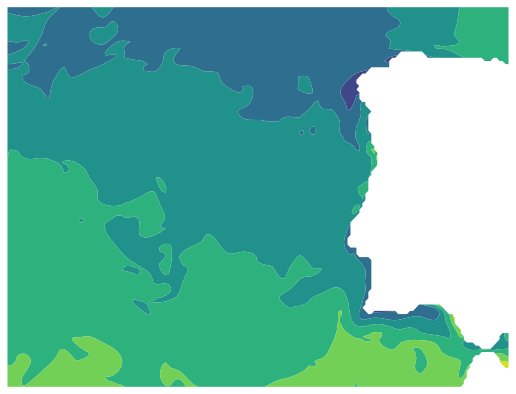

In [83]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.rcParams['figure.figsize'] = 9,7 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])   #como os valores estão super baixos não aparece as linhas a separarem valores no mapa   
#levels = np.array([13, 14, 15, 16, 17, 18, 19, 20])  #permite definir no mapa linhas que separam zonas de diferentes temperaturas

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Temp, len(levels), cmap=cm.viridis)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]     

# Make plot and customize axes
cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors);
plt.axis('off')         #Para remover da imagem os labels com a longitude e latitude
#plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
#plt.title('SST Map 14 December 2019')
 

images_folder = os.path.join(current_path, "../images")
plt.savefig(os.path.join(images_folder, "SST_July10.png"))

#### Transformar as coordenadas (longitude e latitude) numa tupple de Pixels (x,y)

In [26]:
#Criar 2 novas colunas X e Y que sejam os pixels correspondentes

lons = dia10["longitude"].astype("float32").unique()
lats = dia10["latitude"].astype("float32").unique()
lons.sort()
lats.sort()
def get_pixels(lons, lats):
    pixels = {}
    for x, lon in enumerate(lons):
        for y, lat in enumerate(lats):
            pixels[(lon, lat)] = (x, y)
    return pixels
def get_x(lon, lat, pixels):
    return pixels[(lon, lat)][0]
def get_y(lon, lat, pixels):
    return pixels[(lon, lat)][1]
pixels = get_pixels(lons, lats)
dia10["x"] = dia10.apply(lambda row: get_x(row["longitude"], row["latitude"], pixels), axis=1)
dia10["y"] = dia10.apply(lambda row: get_y(row["longitude"], row["latitude"], pixels), axis=1)

In [27]:
#Converter as colunas x e y para uma nova coluna no formato de tupple
dia10['Pixels'] = dia10[['x', 'y']].apply(tuple, axis=1)

In [28]:
dia10

,latitude,longitude,thetao,x,y,Pixels
0,35.0,-19.000000,21.632999,0,0,"(0, 0)"
1,35.0,-18.916666,21.527000,1,0,"(1, 0)"
2,35.0,-18.833334,21.371000,2,0,"(2, 0)"
3,35.0,-18.750000,21.199001,3,0,"(3, 0)"
4,35.0,-18.666666,21.072001,4,0,"(4, 0)"
...,...,...,...,...,...,...
223244,45.0,-5.333334,20.037001,164,120,"(164, 120)"
223245,45.0,-5.250000,20.059000,165,120,"(165, 120)"
223246,45.0,-5.166667,20.074001,166,120,"(166, 120)"
223247,45.0,-5.083334,20.069000,167,120,"(167, 120)"


### Aplicar Canny Edge Detector a imagem (.png) do dia 14 obtida através do Seaborn

No entanto o meu objectivo não é aplicar o Canny edge detector a imagens (.png), pois ao gravar a imagem eu perco as dimensões verdadeiras da matriz da Temperatura (a imagem fica nomeadamente com 3 dimensões (RGB))

O objetivo é aplicar o Canny a um numpy array que é uma representação dessa imagem.

In [34]:
SST_july10 = cv2.imread(os.path.join(images_folder, "SST_July10.png"))
SST_july10

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [35]:
SST_july10.shape

(504, 648, 3)

In [36]:
x = os.path.join(images_folder, "SST_July14.png")
x

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks\\../images\\SST_July14.png'

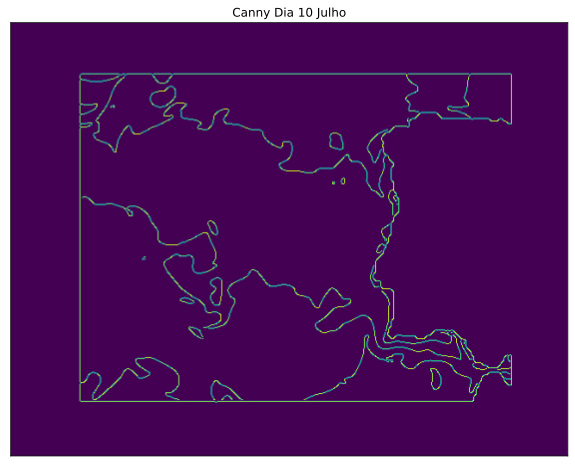

In [37]:
canny = cv2.Canny(SST_july10, 100, 180, L2gradient=False, apertureSize=3)
#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 3 and 7
#L2gradient -> specifies the equation for finding gradient magnitude. L2gradient is of boolean type. Its default value is False

plt.rcParams["figure.figsize"] = (10,8)

plt.imshow(canny)    #'gray'-> parametro para por a preto e branco
plt.title('Canny Dia 10 Julho')
plt.xticks([])
plt.yticks([])
    
plt.show()
#Aplicação do Canny diretamente à imagem previamente guardada

### Aplicar o Canny Algorithm ao numpy array 

Agora vamos aplicar o Canny algorithm no numpy de dimensoes (121, 169) que representa os valores de temperatura

In [ ]:
canny = cv2.Canny(Temp, 100, 200)

#Eu quero fazer um Canny não da imagem que gravei mas da matriz que dá origem a essa imagem 
#Pq quando eu converto para imagem (.png) as dimensões fodem-se todas

#Verificar se o canny aceita Null values e se tenho de converter os valores de temperatura para uma escala entre 0 e 255

# Dá erro pq o Numpy Temp tem de ser do tipo uint8. CV_8U is just an alias for the datatype uint8.

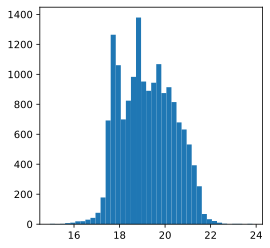

In [39]:
plt.hist(Temp.flatten(), bins=40);
plt.rcParams["figure.figsize"] = 4,4

#### --------------------------------------------------------------------------------------------------------------
#### Usar um array com o formato uint8 (Valores na gama normal entre 0 e 20)
#### --------------------------------------------------------------------------------------------------------------

In [40]:
Temp_aux = Temp.copy() #criar um numpy auxiliar que é uma cópia do numpy Temp
Temp_aux

array([[21.633   , 21.527   , 21.371   , ...,       nan,       nan,
              nan],
       [21.605   , 21.504002, 21.371   , ...,       nan,       nan,
              nan],
       [21.605   , 21.512001, 21.389   , ...,       nan,       nan,
              nan],
       ...,
       [18.039001, 17.988   , 17.953001, ..., 20.18    , 20.169   ,
        20.149   ],
       [17.895   , 17.891   , 17.875   , ..., 20.115002, 20.115002,
        20.093   ],
       [17.898   , 17.895   , 17.879   , ..., 20.074001, 20.069   ,
        20.047   ]], dtype=float32)

In [41]:
Temp_aux.shape

(121, 169)

In [42]:
#Converter o array para o formato uint8
Temp_aux = Temp_aux.astype(np.uint8)

In [43]:
Temp_aux

array([[21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0],
       ...,
       [18, 17, 17, ..., 20, 20, 20],
       [17, 17, 17, ..., 20, 20, 20],
       [17, 17, 17, ..., 20, 20, 20]], dtype=uint8)

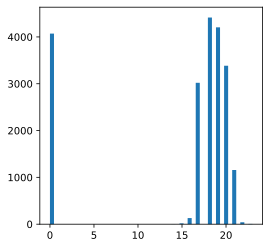

In [91]:
#Para verificarmos que os valores estão de facto entre 0 e 20
plt.hist(Temp_aux.flatten(), bins=50);
plt.rcParams["figure.figsize"] = 4, 4

In [45]:
Temp_aux = np.flipud(Temp_aux)   #flipud -> Reverse the order of elements along axis 0 (up/down).
Temp_aux

array([[17, 17, 17, ..., 20, 20, 20],
       [17, 17, 17, ..., 20, 20, 20],
       [18, 17, 17, ..., 20, 20, 20],
       ...,
       [21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0]], dtype=uint8)

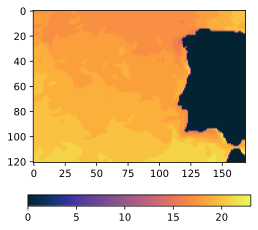

In [47]:
#Plotar o numpy array para ver se de facto corresponde há imagem em causa
import cmocean
im = plt.imshow(Temp_aux, cmocean.cm.thermal)
plt.rcParams["figure.figsize"] = (9,9)
plt.colorbar(im, orientation='horizontal')
plt.show()

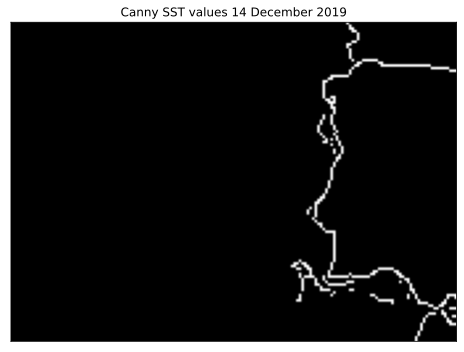

In [48]:
canny = cv2.Canny(Temp_aux, 3.75, 7.5, L2gradient=False, apertureSize=3)

plt.rcParams["figure.figsize"] = (8,8)

plt.imshow(canny, 'gray')    #'gray'-> parametro para por a preto e branco
plt.title('Canny SST values 14 December 2019')
plt.xticks([])
plt.yticks([])
    
plt.show()

#Canny aplicado ao numpy array

#### --------------------------------------------------------------------------------------------------------------
#### Usar um array com formato uint8, com valores entre 0 e 255 (MAIS CORRETO)
#### --------------------------------------------------------------------------------------------------------------

In [92]:
# Matriz de temperatura em que os valores estão entre 0 e 255
Temp_aux5 = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')
Temp_aux5

array([[191, 188, 184, ...,   0,   0,   0],
       [191, 188, 184, ...,   0,   0,   0],
       [191, 188, 184, ...,   0,   0,   0],
       ...,
       [ 88,  87,  86, ..., 150, 149, 149],
       [ 84,  84,  84, ..., 148, 148, 147],
       [ 84,  84,  84, ..., 147, 146, 146]], dtype=uint8)

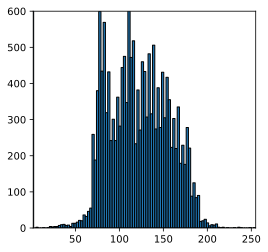

In [98]:
#Para verificarmos que os valores estão de facto entre 0 e 255
plt.hist(Temp_aux5.flatten(), bins=100, edgecolor='black');
plt.xlim([2, 255])
plt.ylim([0, 600])
plt.rcParams["figure.figsize"] = 4, 4

In [52]:
Temp_aux5 = np.flipud(Temp_aux5)   #flipud -> Reverse the order of elements along axis 0 (up/down).
Temp_aux5

array([[ 84,  84,  84, ..., 147, 146, 146],
       [ 84,  84,  84, ..., 148, 148, 147],
       [ 88,  87,  86, ..., 150, 149, 149],
       ...,
       [191, 188, 184, ...,   0,   0,   0],
       [191, 188, 184, ...,   0,   0,   0],
       [191, 188, 184, ...,   0,   0,   0]], dtype=uint8)

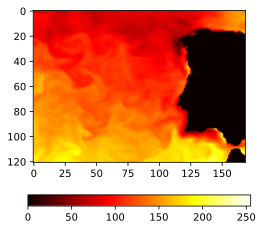

In [53]:
#Plotar o numpy array para ver se de facto corresponde há imagem em causa
im3 = plt.imshow(Temp_aux5, cmap='hot')
plt.rcParams["figure.figsize"] = (7,7)
plt.colorbar(im3, orientation='horizontal')
plt.show()

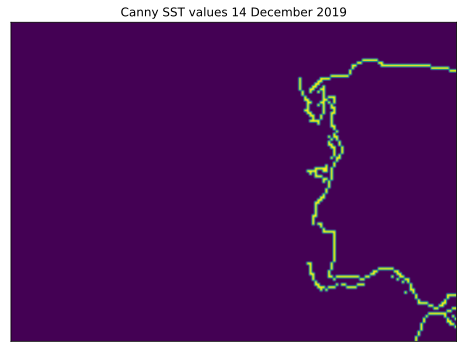

In [56]:
canny3 = cv2.Canny(Temp_aux5, 10, 200, L2gradient=False, apertureSize=3)

plt.rcParams["figure.figsize"] = (8,8)

plt.imshow(canny3)    #'gray'-> parametro para por a preto e branco
plt.title('Canny SST values 14 December 2019')
plt.xticks([])
plt.yticks([])
    
plt.show()

### Para Interpretação

<ipython-input-82-82ee92a74ef5>:36: UserWarning: No contour levels were found within the data range.
  cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)


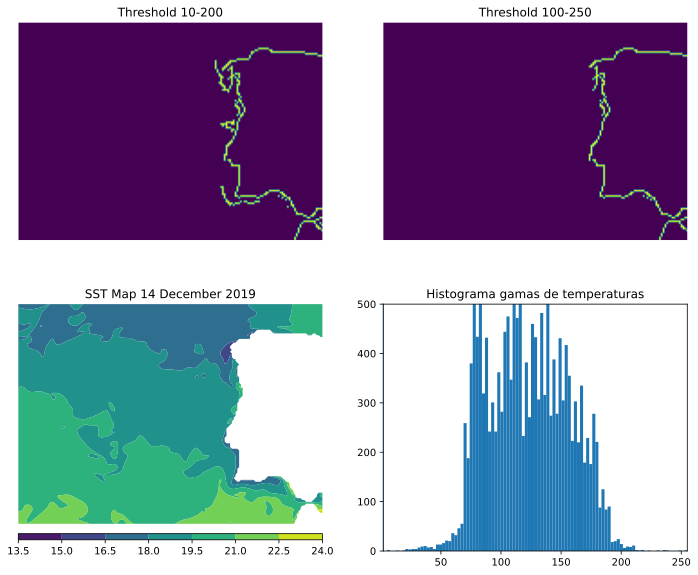

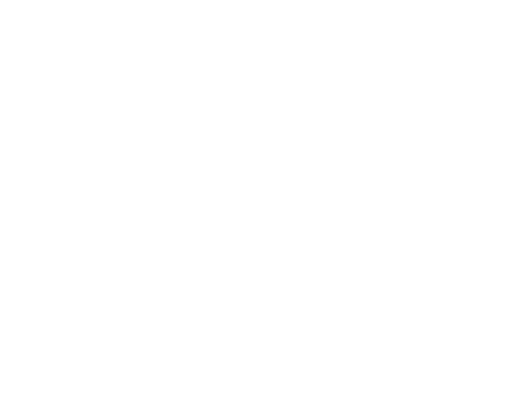

In [82]:
# create figure
fig = plt.figure(figsize=(12, 10))

# setting values to rows and column variables
rows = 2
columns = 2

#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 3 and 7
#L2gradient -> specifies the equation for finding gradient magnitude. L2gradient is of boolean type. Its default value is False

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Definição dos parametros do canny
canny_1 = cv2.Canny(Temp_aux5, 10, 200, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_1)
plt.axis('off')
plt.title("Threshold 10-200");

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
#Definição dos parametros do canny
canny_2 = cv2.Canny(Temp_aux5, 100, 250, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_2)
plt.axis('off')
plt.title("Threshold 100-250");


# Adds a subplot to show the image

ax = fig.add_subplot(rows, columns, 3)
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(X,Y,Temp, len(levels), cmap=cm.viridis)
# Make plot and customize axes
cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors);
plt.axis('off');       #Para remover da imagem os labels com a longitude e latitude
plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
plt.title('SST Map 10 July 2019');


# Adds a subplot at tshow um histograma com a dispersão dos valores de temperatura na matriz da imagem
fig.add_subplot(rows, columns, 4)
#Definição dos parametros do canny
histograma = plt.hist(Temp_aux5.flatten(), bins=100);
plt.xlim([2, 255])
plt.ylim([0, 500])
# showing image
plt.title("Histograma gamas de temperaturas");
plt.show(histograma);
plt.axis('off');

    
#plt.show()